In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import missingno as msno

from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False

# data_loc = "D:/data/h-and-m-personalized-fashion-recommendations/"
data_loc = "G:/내 드라이브/프로젝트/Kaggle_H&M/data/h-and-m-personalized-fashion-recommendations/"

In [4]:
def row_show(x=None):
    pd.set_option("max_rows", x)
    
def col_show(x=None):
    pd.set_option("max_columns",x)

os.listdir(data_loc)

['images',
 'articles.csv',
 'customers.csv',
 'sample_submission.csv',
 'transactions_train.csv',
 'desktop.ini']

# 0.Data Load
---

In [5]:
df_customers = pd.read_csv(data_loc+"customers.csv", encoding="utf-8")
df_articles = pd.read_csv(data_loc+"articles.csv", encoding="utf-8")
# df_submissions = pd.read_csv(data_loc+"sample_submission.csv", encoding="utf-8")
# df_transactions_train = pd.read_csv(data_loc+"transactions_train.csv", encoding="utf-8")

# 1.Data Look Up
---

**data look up list**
- df_customers
- df_articles
- df_transactions_train

## 1.1.Customers Data
---

### 1.1.1.Basic Information
---

In [8]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [9]:
## look up columns in df_cutomers

for col in df_customers.columns:
    unq = df_customers[col].unique()
    print(f"{col}:\t{unq if len(unq) < 10 else '*** Lots Of Values ***'}\n")

customer_id:	*** Lots Of Values ***

FN:	[nan  1.]

Active:	[nan  1.]

club_member_status:	['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']

fashion_news_frequency:	['NONE' 'Regularly' nan 'Monthly' 'None']

age:	*** Lots Of Values ***

postal_code:	*** Lots Of Values ***



**Relation between `FN` column and `Active` column**

- First, Replacement NaN value in "FN" and "Active"
- Second, Check the Spearman Correlation Coefficent

*RESULT : There is a high correlation between the two.*

In [10]:
df_customers["FN"].fillna(0., inplace=True)
df_customers["Active"].fillna(0., inplace=True)

df_customers[["FN", "Active"]].corr()

,FN,Active
FN,1.000000,0.979947
Active,0.979947,1.000000


**Relation between `ACTIVE` column and the `ACITVE` record in `club_member_status`**

- First, sum `Active` column (we already replacement Nan -> 0.)
- Second, sum `club_member_status` if it has `ACTIVE` value

*RESULT : They don't have any realation.*

In [11]:
print(df_customers["Active"].sum())
print((df_customers["club_member_status"]=="ACTIVE").sum())

464404.0
1272491


**What mean columns in `df_customers`**

- `customer_id` : Customer's Unique ID

- `FN : <span style="color:magenta"> I DON'T KNOW WHAT IT MEANS </span>

- `Active`: <span style="color:magenta"> I DON'T KNOW WHAT IT MEANS </span>

- `club_member_status`: The status that customers sign in members (It has 3 status - ACTIVE, PRE-CREATE, LEFT CLUB +NAN)

- `fashion_news_frequency`: The qualitative cycle to read fashion news

- `age`: Customer's age

- `postal_code`:


In [12]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [13]:
df_customers.describe()

,FN,Active,age
count,1.371980e+06,1.371980e+06,1.356119e+06
mean,3.476217e-01,3.384918e-01,3.638696e+01
std,4.762153e-01,4.731969e-01,1.431363e+01
min,0.000000e+00,0.000000e+00,1.600000e+01
25%,0.000000e+00,0.000000e+00,2.400000e+01
50%,0.000000e+00,0.000000e+00,3.200000e+01
75%,1.000000e+00,1.000000e+00,4.900000e+01
max,1.000000e+00,1.000000e+00,9.900000e+01


continuous columns: ['FN', 'Active', 'age']
categorical columns: ['customer_id', 'club_member_status', 'fashion_news_frequency', 'postal_code']


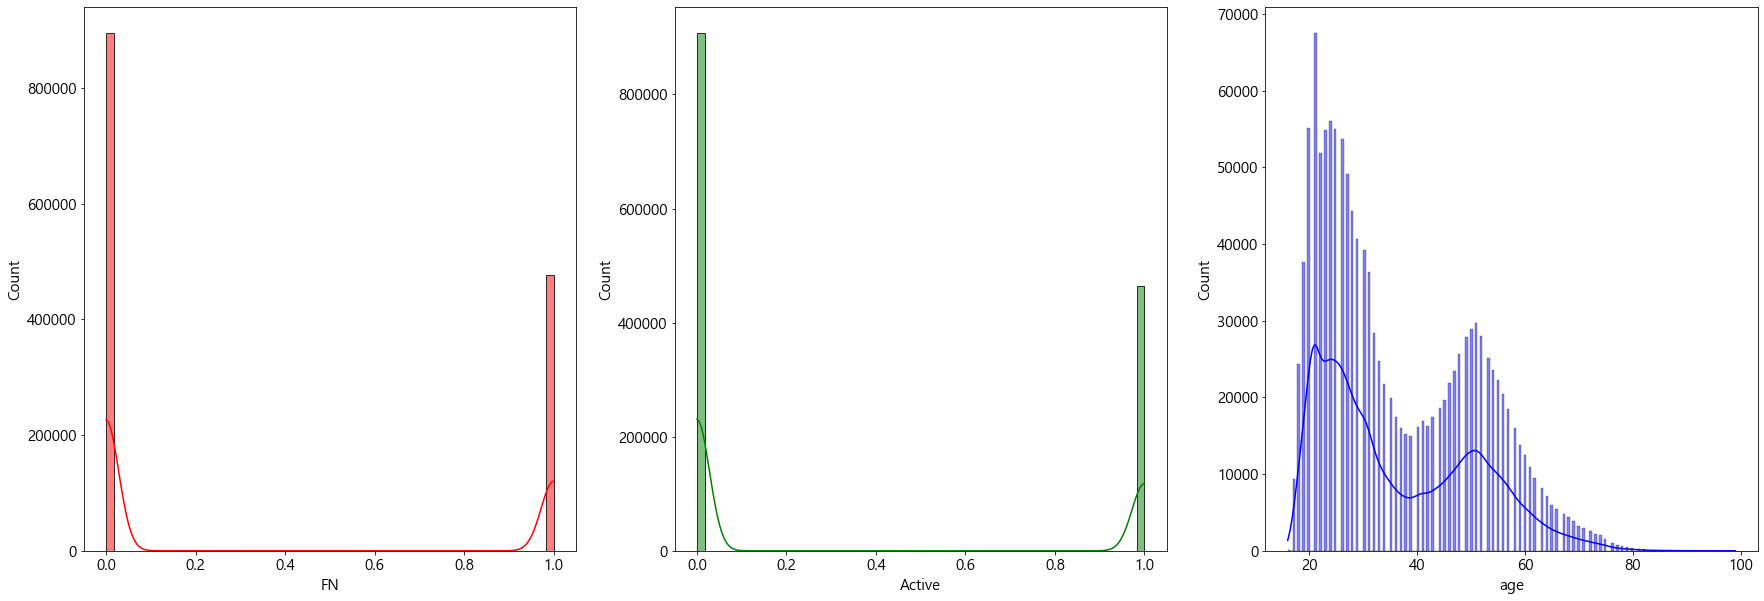

In [14]:
cont_cols, cate_cols =[], []
for col in df_customers.columns:
    if df_customers[col].dtype=="object": cate_cols.append(col)
    else: cont_cols.append(col)
    
print(f"continuous columns: {cont_cols}")
print(f"categorical columns: {cate_cols}")

plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (30,10)
fig, ax = plt.subplots(1,3)
for i,color in zip(range(0,3),["red","green","blue"]):
    sns.histplot(ax=ax[i], data=df_customers[cont_cols[i]], kde=True, color=color)
    
plt.show()

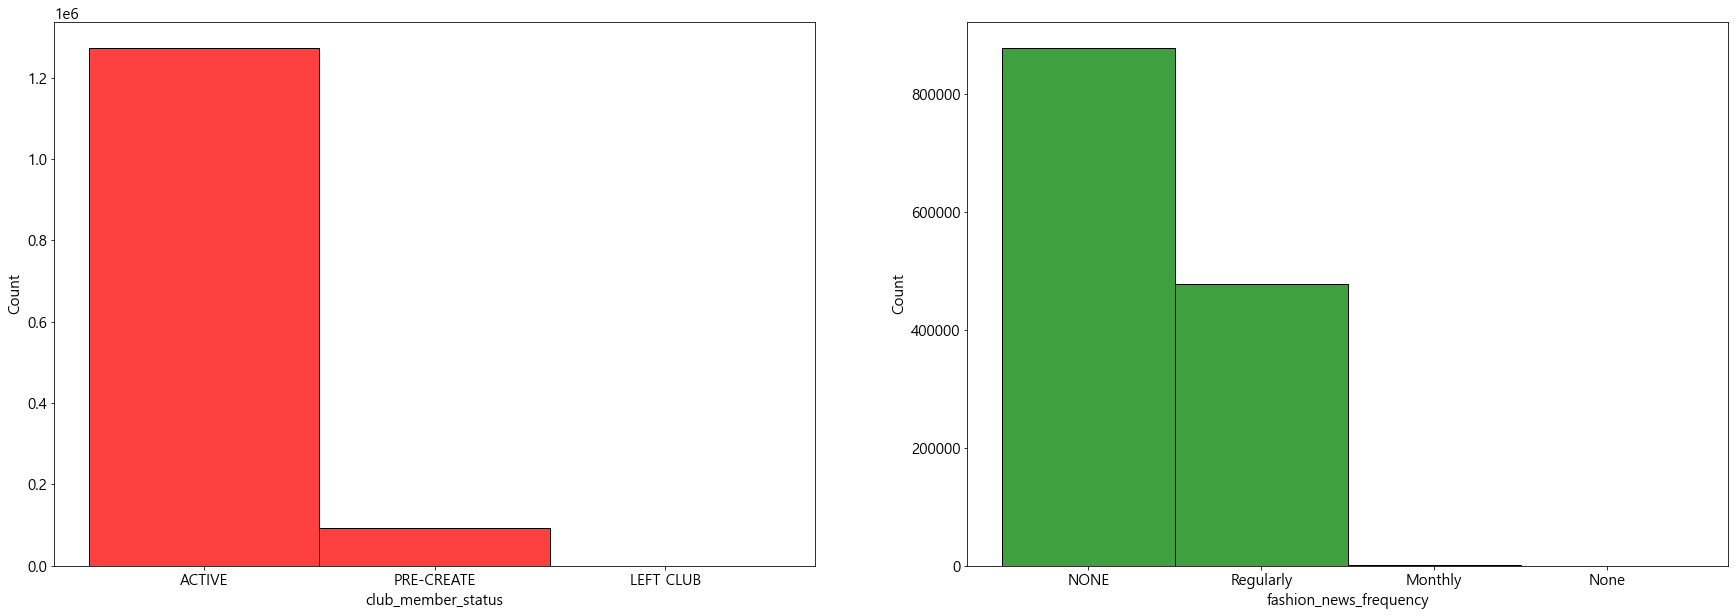

=== frequency of categorical columns ===
club_member_status Frequency: 
	ACTIVE: 1272491
	nan: 0
	PRE-CREATE: 92960
	LEFT CLUB: 467
fashion_news_frequency Frequency: 
	NONE: 877711
	Regularly: 477416
	nan: 0
	Monthly: 842
	None: 2


In [15]:
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (30,10)
fig, ax = plt.subplots(1,2)
for i,color in zip(range(0,4),[0, "red","green","blue"]):
    if i==0 or i==3: continue
    sns.histplot(ax=ax[i-1], data=df_customers[cate_cols[i]], color=color)
    
plt.show()

print("=== frequency of categorical columns ===")
for i in range(0,4):
    if i==0 or i==3: continue
    print(f"{cate_cols[i]} Frequency: ")
    for record in df_customers[cate_cols[i]].unique():
        print(f"\t{record}: {sum(df_customers[cate_cols[i]]==record)}")
        

### 1.1.2.Missing Value
---

 ==== missing value report ====
	 Missing value count 
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64
	 Missing value ratio 
customer_id               0.000000
FN                        0.652378
Active                    0.661508
club_member_status        0.004418
fashion_news_frequency    0.011669
age                       0.011561
postal_code               0.000000
dtype: float64


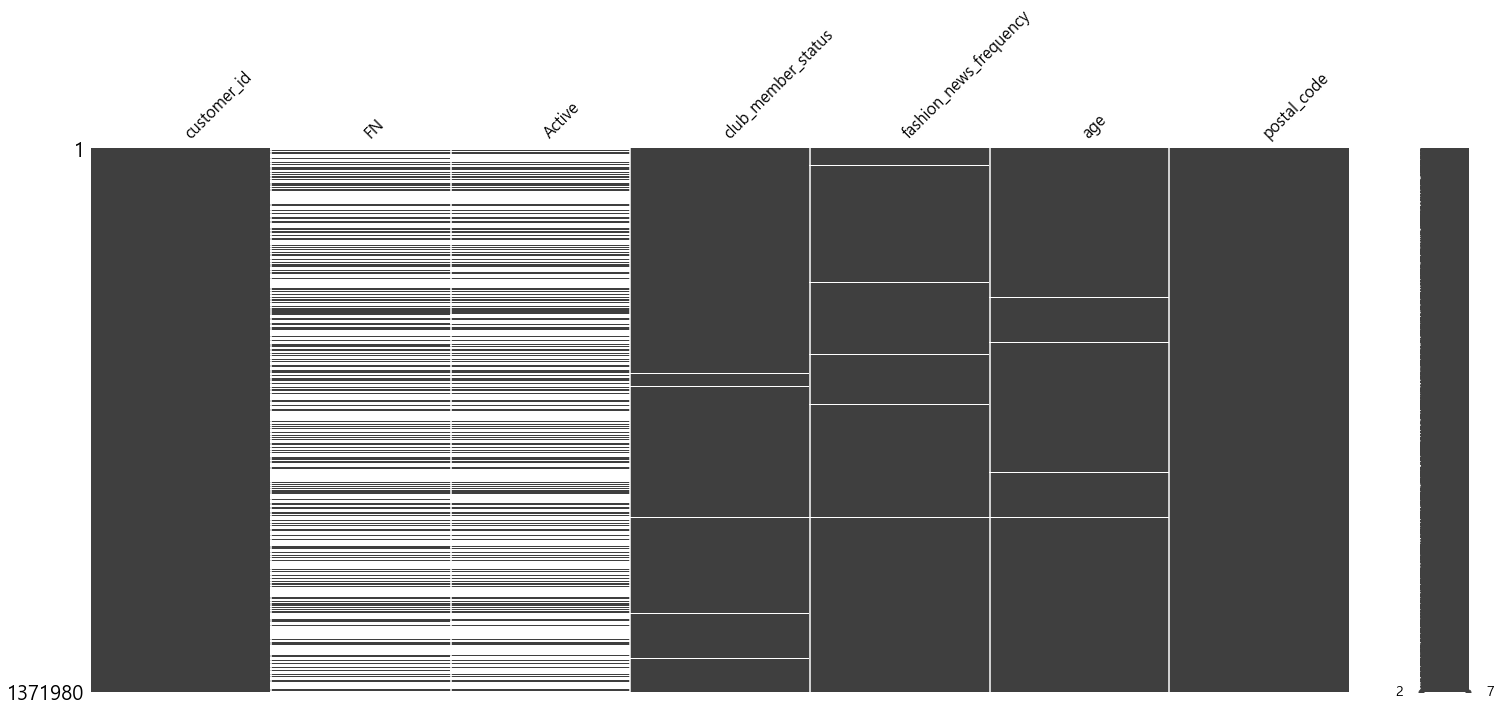

In [16]:
def missing_value_report(df):
    print(" ==== missing value report ====")
    print(f"\t Missing value count \n{df.isna().sum(axis=0)}")
    print(f"\t Missing value ratio \n{(df.isna().sum(axis=0))/len(df['customer_id'])}")
    msno.matrix(df)
    plt.show

missing_value_report(df_customers)

## 1.2.Articles Data
---

In [16]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [20]:
## look up columns in df_cutomers

for col in df_articles.columns:
    unq = df_articles[col].unique()
    print(f"{col}:\t{unq if len(unq) < 10 else '*** Lots Of Values *** ::: ', len(unq)}")

article_id:	('*** Lots Of Values *** ::: ', 105542)
product_code:	('*** Lots Of Values *** ::: ', 47224)
prod_name:	('*** Lots Of Values *** ::: ', 45875)
product_type_no:	('*** Lots Of Values *** ::: ', 132)
product_type_name:	('*** Lots Of Values *** ::: ', 131)
product_group_name:	('*** Lots Of Values *** ::: ', 19)
graphical_appearance_no:	('*** Lots Of Values *** ::: ', 30)
graphical_appearance_name:	('*** Lots Of Values *** ::: ', 30)
colour_group_code:	('*** Lots Of Values *** ::: ', 50)
colour_group_name:	('*** Lots Of Values *** ::: ', 50)
perceived_colour_value_id:	(array([ 4,  3,  1,  2,  5,  7,  6, -1], dtype=int64), 8)
perceived_colour_value_name:	(array(['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'], dtype=object), 8)
perceived_colour_master_id:	('*** Lots Of Values *** ::: ', 20)
perceived_colour_master_name:	('*** Lots Of Values *** ::: ', 20)
department_no:	('*** Lots Of Values *** ::: ', 299)
department_name:	('*** 

**What mean columns in `df_articles`**

- `article_id`:	The Identification Nubmer aobut articles
- `product_code`: 
- `prod_name`:	
- `product_type_no`: 
- `product_type_name`: 
- `product_group_name`: 
- `graphical_appearance_no`: 
- `graphical_appearance_name`: 
- `colour_group_code`: 
- `colour_group_name`: 
- `perceived_colour_value_id`: 
- `perceived_colour_value_name`: 
- `perceived_colour_master_id`: 
- `perceived_colour_master_name`: 
- `department_no`: 
- `department_name`: 
- `index_code`: 
- `index_name`: 
- `index_group_no`:	
- `index_group_name`: 
- `section_no`: 
- `section_name`: 
- `garment_group_no`: 
- `garment_group_name`: 
- `detail_desc`: 


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
df_customers.describe()

,FN,Active,age
count,1.371980e+06,1.371980e+06,1.356119e+06
mean,3.476217e-01,3.384918e-01,3.638696e+01
std,4.762153e-01,4.731969e-01,1.431363e+01
min,0.000000e+00,0.000000e+00,1.600000e+01
25%,0.000000e+00,0.000000e+00,2.400000e+01
50%,0.000000e+00,0.000000e+00,3.200000e+01
75%,1.000000e+00,1.000000e+00,4.900000e+01
max,1.000000e+00,1.000000e+00,9.900000e+01


continuous columns: ['FN', 'Active', 'age']
categorical columns: ['customer_id', 'club_member_status', 'fashion_news_frequency', 'postal_code']


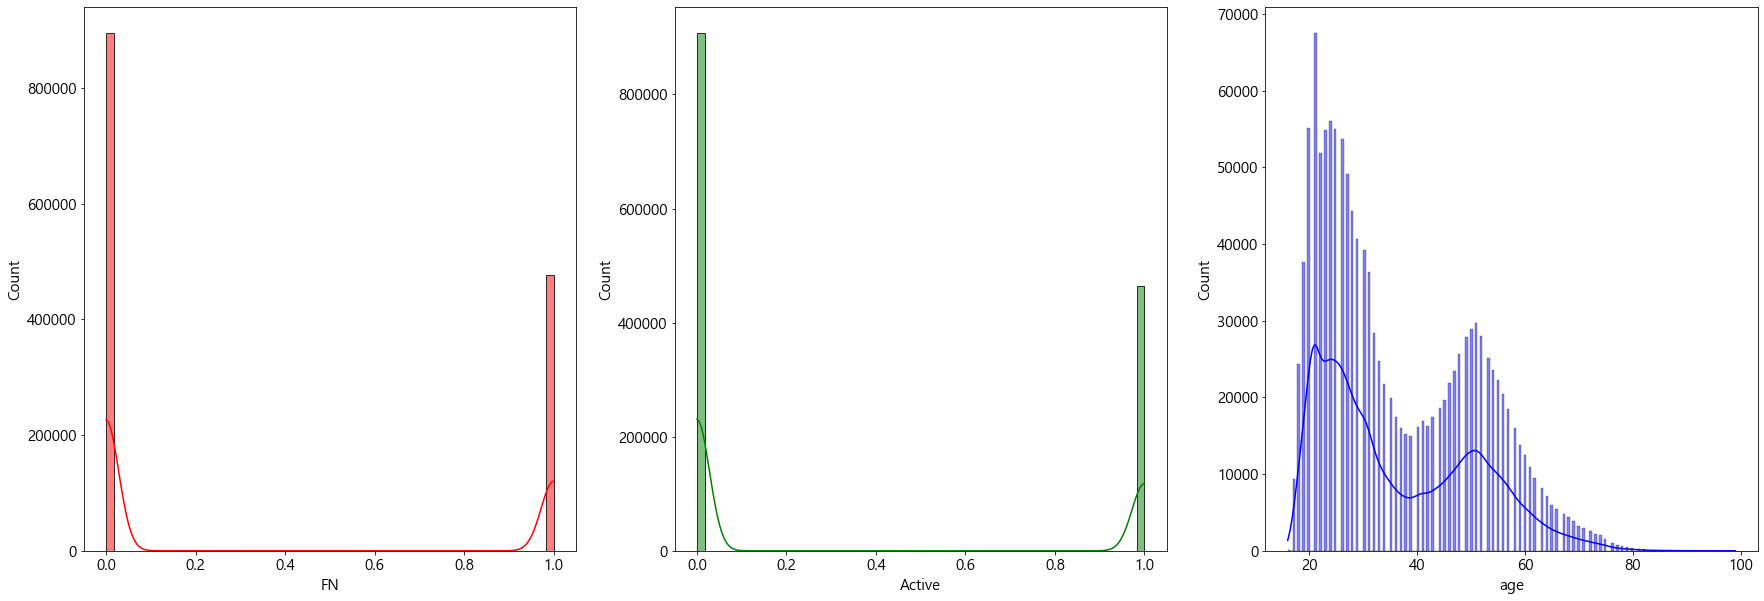

In [ ]:
cont_cols, cate_cols =[], []
for col in df_customers.columns:
    if df_customers[col].dtype=="object": cate_cols.append(col)
    else: cont_cols.append(col)
    
print(f"continuous columns: {cont_cols}")
print(f"categorical columns: {cate_cols}")

plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (30,10)
fig, ax = plt.subplots(1,3)
for i,color in zip(range(0,3),["red","green","blue"]):
    sns.histplot(ax=ax[i], data=df_customers[cont_cols[i]], kde=True, color=color)
    
plt.show()